<a href="https://colab.research.google.com/github/efe-akpinar/sleep-quality-analysis/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSA 210 TERM PROJECT**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [106]:
df = pd.read_excel(f'/content/Copy of Updated_Sleep_Dataset_With_Quality11.xlsx')
df.head()

,Unnamed: 0,Date,Total_Steps,Total_Calories_Burned,Total_Sleep_Hours,Context,REM_Sleep,Deep_Sleep,Core_Sleep,Sleep_Quality
0,0,2023-10-30,2903,126.919,6.667003,School Semester,1.583107,1.237722,3.846174,1
1,1,2023-10-31,4848,217.755,6.339772,School Semester,1.870686,1.051574,3.417512,1
2,2,2023-11-01,517,24.054,6.522433,School Semester,1.781925,0.758516,3.981992,1
3,3,2023-11-02,2805,125.382,5.920632,School Semester,1.538570,0.633844,3.748217,0
4,4,2023-11-03,1996,71.443,6.082107,School Semester,1.311314,0.998937,3.771856,1


# **TESTING IF THE DATA IS COMPLETE**

In [77]:
df.columns.size

11

In [78]:
df.isna().sum()

,0
Unnamed: 0,0
Date,0
Total_Steps,0
Total_Calories_Burned,0
Total_Sleep_Hours,0
Context,0
REM_Sleep,0
Deep_Sleep,0
Core_Sleep,0
Sleep_Quality,0


In [34]:
df.duplicated().sum()

0

In [75]:
df.size

3861

In [76]:
df.shape


(351, 11)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             351 non-null    int64         
 1   Date                   351 non-null    datetime64[ns]
 2   Total_Steps            351 non-null    int64         
 3   Total_Calories_Burned  351 non-null    float64       
 4   Total_Sleep_Hours      351 non-null    float64       
 5   Context                351 non-null    category      
 6   REM_Sleep              351 non-null    float64       
 7   Deep_Sleep             351 non-null    float64       
 8   Core_Sleep             351 non-null    float64       
 9   Sleep_Quality          351 non-null    object        
 10  Month                  351 non-null    period[M]     
dtypes: category(1), datetime64[ns](1), float64(5), int64(2), object(1), period[M](1)
memory usage: 28.0+ KB


In [80]:
df.describe()

,Unnamed: 0,Date,Total_Steps,Total_Calories_Burned,Total_Sleep_Hours,REM_Sleep,Deep_Sleep,Core_Sleep
count,351.000000,351,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,175.000000,2024-04-22 00:00:00.000000256,4666.034188,202.600749,6.647651,1.653296,0.996260,3.998095
min,0.000000,2023-10-30 00:00:00,66.000000,3.632000,0.754722,0.190195,0.132142,0.432385
25%,87.500000,2024-01-25 12:00:00,2116.500000,84.682000,5.609722,1.319569,0.740004,3.312107
50%,175.000000,2024-04-22 00:00:00,4177.000000,175.840000,6.239800,1.569416,0.937679,3.759626
75%,262.500000,2024-07-18 12:00:00,6241.500000,274.343000,7.001111,1.858826,1.155548,4.238485
max,350.000000,2024-10-14 00:00:00,32801.000000,1086.729000,14.727500,4.174844,2.859292,9.335297
std,101.469207,NaN,3664.958698,149.596202,2.255263,0.582398,0.416885,1.384549


In [81]:
df.columns

Index(['Unnamed: 0', 'Date', 'Total_Steps', 'Total_Calories_Burned',
       'Total_Sleep_Hours', 'Context', 'REM_Sleep', 'Deep_Sleep', 'Core_Sleep',
       'Sleep_Quality', 'Month'],
      dtype='object')

# **Preliminary EDA**

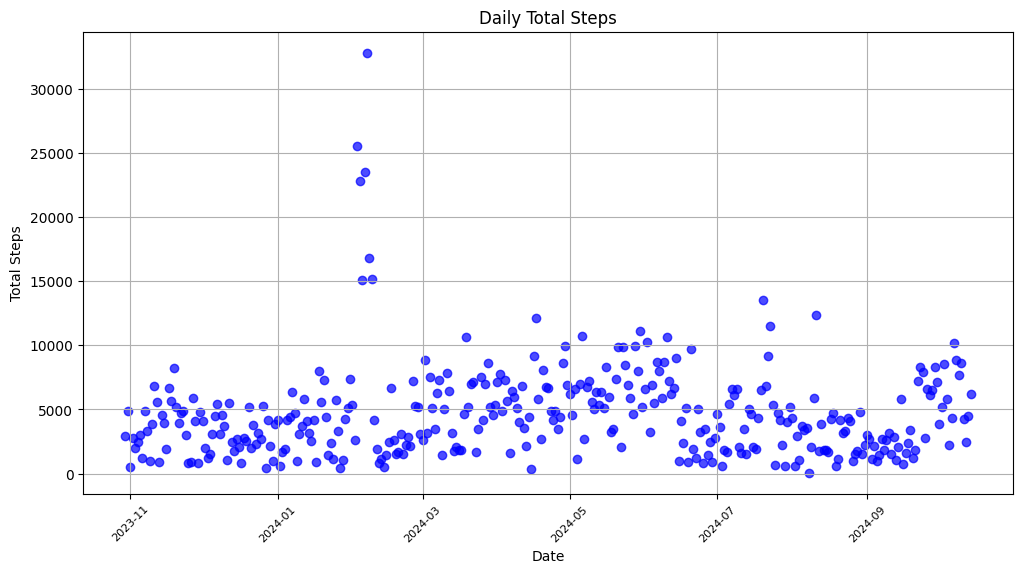

In [56]:
# Plot total steps day by day as a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Total_Steps'], color='blue', alpha=0.7)
plt.title('Daily Total Steps')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.show()

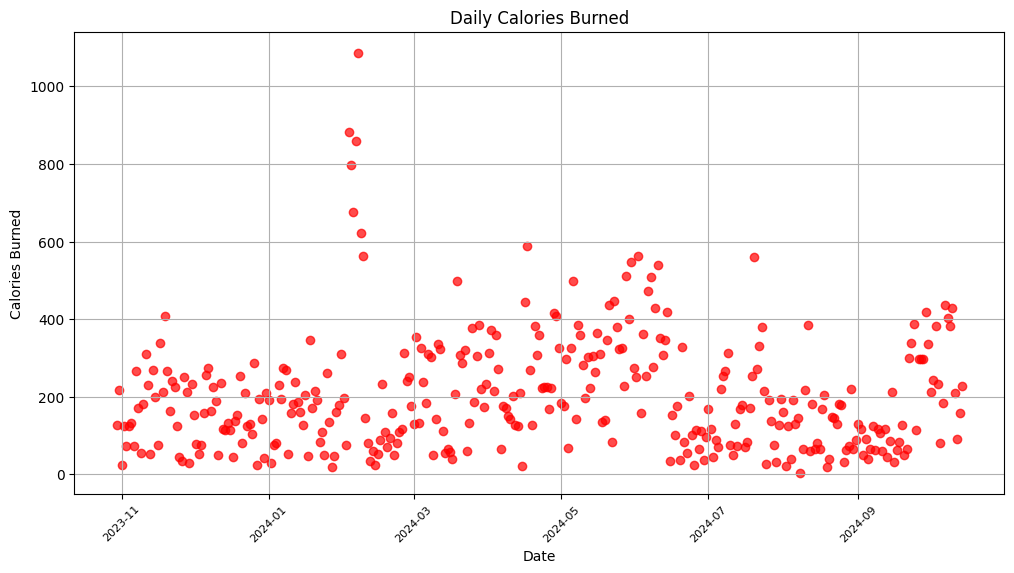

In [58]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Total_Calories_Burned'], color='red', alpha=0.7)
plt.title('Daily Calories Burned')
plt.xlabel('Date')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.show()

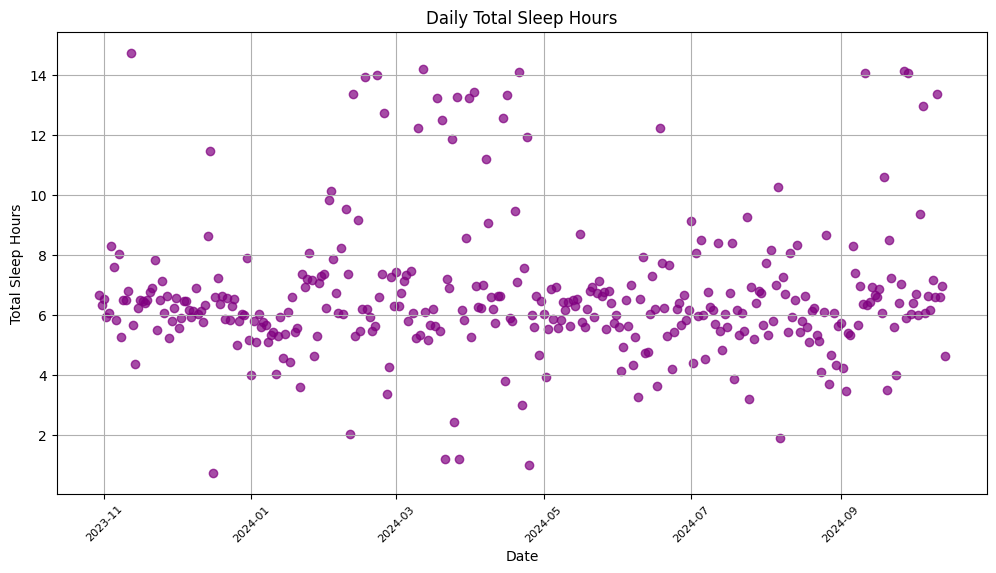

In [59]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Total_Sleep_Hours'], color='purple', alpha=0.7)
plt.title('Daily Total Sleep Hours')
plt.xlabel('Date')
plt.ylabel('Total Sleep Hours')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.show()

<ipython-input-65-9467d29fdde0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Date', y='Context', data=df, jitter=True, palette='Set2', alpha=0.7)


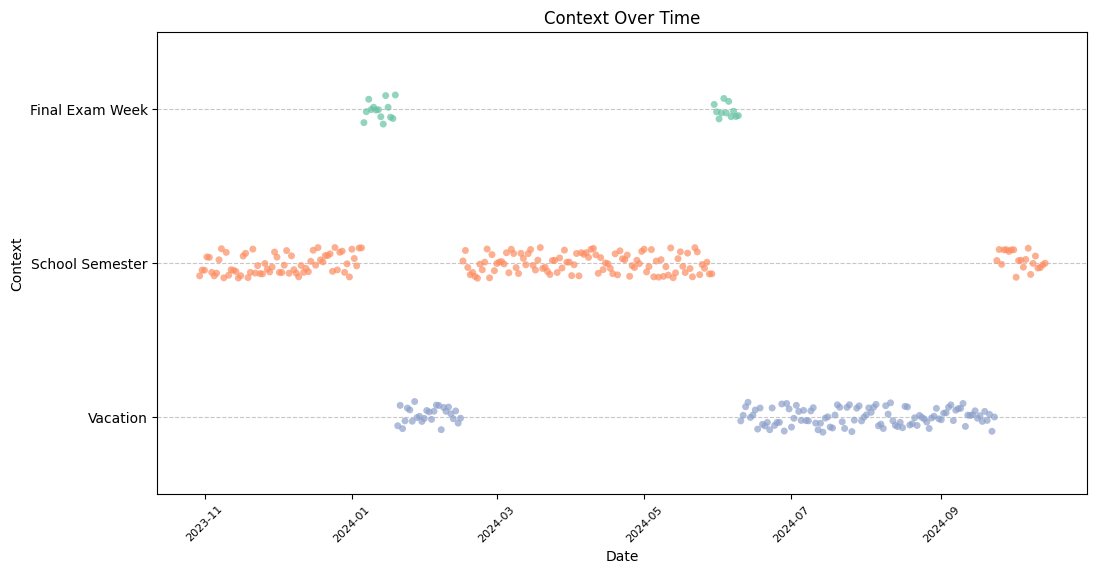

In [65]:
# Plot Context by Date using a strip plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='Date', y='Context', data=df, jitter=True, palette='Set2', alpha=0.7)
plt.title('Context Over Time')
plt.xlabel('Date')
plt.ylabel('Context')
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

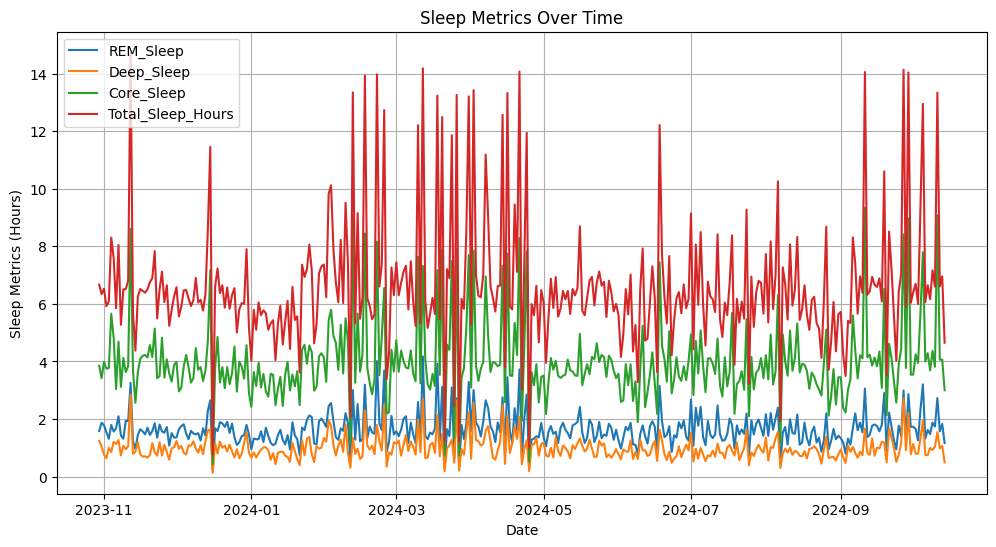

In [74]:
# List of numerical columns to visualize
numerical_columns = ['REM_Sleep', 'Deep_Sleep', 'Core_Sleep', 'Total_Sleep_Hours']

# Plot numerical columns over time
plt.figure(figsize=(12, 6))
for col in numerical_columns:
    plt.plot(df['Date'], df[col], label=col)

plt.title('Sleep Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Metrics (Hours)')
plt.legend()
plt.grid(True)
plt.show()

# **Physical Activity vs Sleep Quality**

In [82]:
# Since Total steps and calories burned strongly corraleted, I will consider only number of steps as a physical activity
total_steps_vs_calories_burned_corr = df[['Total_Steps', 'Total_Calories_Burned']].corr()
total_steps_vs_calories_burned_corr

,Total_Steps,Total_Calories_Burned
Total_Steps,1.000000,0.962737
Total_Calories_Burned,0.962737,1.000000


In [83]:
relation_coeff = total_steps_vs_calories_burned_corr.iloc[0, 1]
relation_coeff

0.9627366070810023

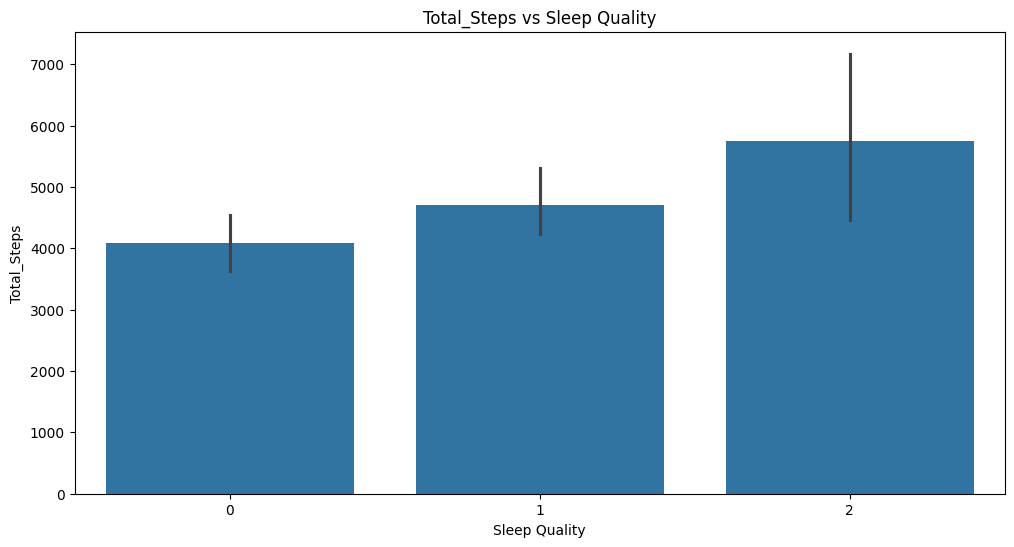

In [107]:
plt.figure(figsize = (12,6))
sns.barplot(y = 'Total_Steps', x = 'Sleep_Quality', data = df)
plt.title("Total_Steps vs Sleep Quality")
plt.ylabel("Total_Steps")
plt.xlabel("Sleep Quality")
plt.show()

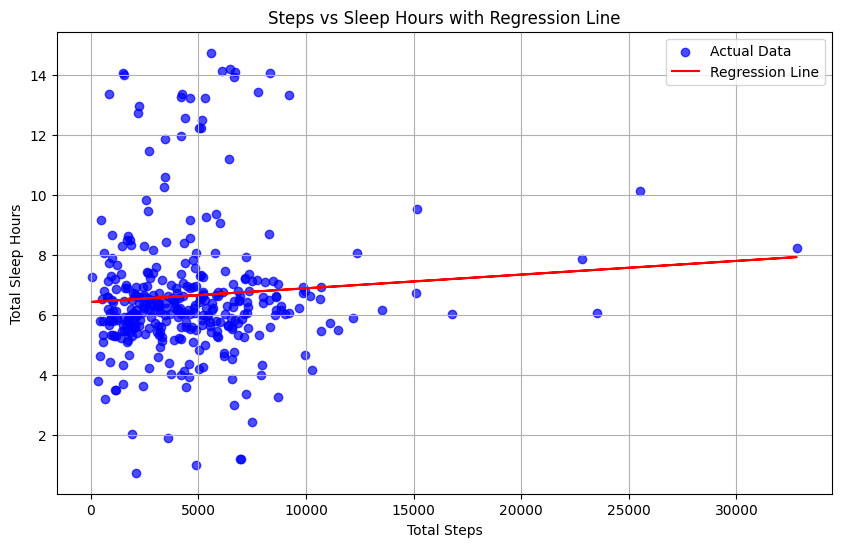

Regression Coefficient (Slope): 4.5539346513349595e-05
Regression Intercept: 6.435163030500921


In [108]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape Steps for Linear Regression
X_steps = df['Total_Steps'].values.reshape(-1, 1)
Y_sleep = df['Total_Sleep_Hours']

# Train the model
model = LinearRegression()
model.fit(X_steps, Y_sleep)

# Make predictions
Y_pred = model.predict(X_steps)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Steps'], df['Total_Sleep_Hours'], alpha=0.7, color='blue', label='Actual Data')
plt.plot(df['Total_Steps'], Y_pred, color='red', label='Regression Line')
plt.title('Steps vs Sleep Hours with Regression Line')
plt.xlabel('Total Steps')
plt.ylabel('Total Sleep Hours')
plt.legend()
plt.grid(True)
plt.show()

# Model coefficient and intercept
print(f"Regression Coefficient (Slope): {model.coef_[0]}")
print(f"Regression Intercept: {model.intercept_}")

In [110]:
model = LinearRegression()

X = df[['Total_Steps']]
Y = df['Sleep_Quality']

model.fit(X, Y)

LinearRegression()

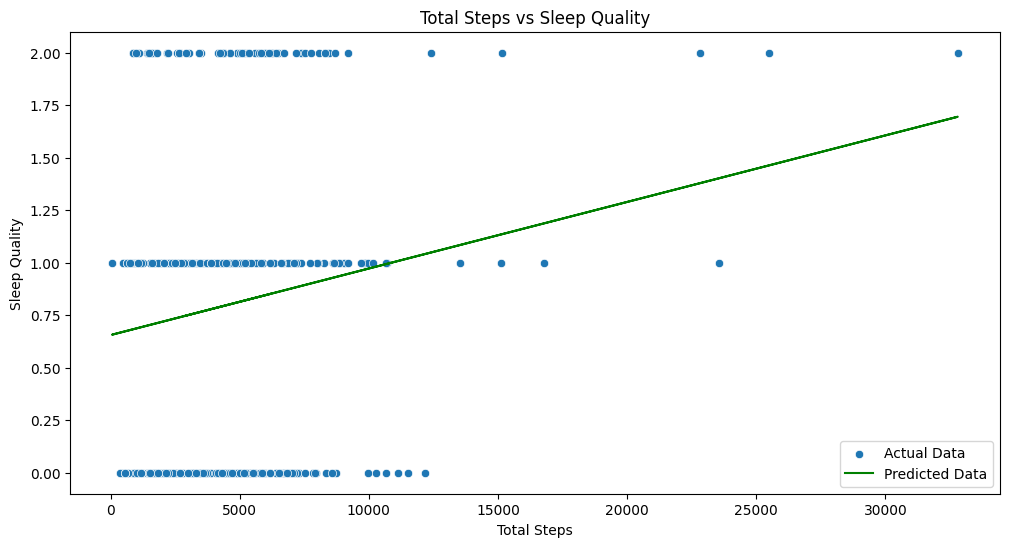

In [132]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Total_Steps', y = 'Sleep_Quality', data = df, label = 'Actual Data')

plt.plot(X, model.predict(X), color = 'green', label = 'Predicted Data')

plt.title("Total Steps vs Sleep Quality")
plt.xlabel("Total Steps")
plt.ylabel("Sleep Quality")
plt.legend()
plt.show()

In [133]:
from sklearn.metrics import r2_score
r2_score(Y, model.predict(X))

0.02519338352148881

# **Context(School Semester/Vacation/Finals Week) vs Sleep_Quality**

<ipython-input-158-5f70a6103deb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Context', y='Sleep_Quality', data=df, palette='viridis', alpha=0.7)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-p

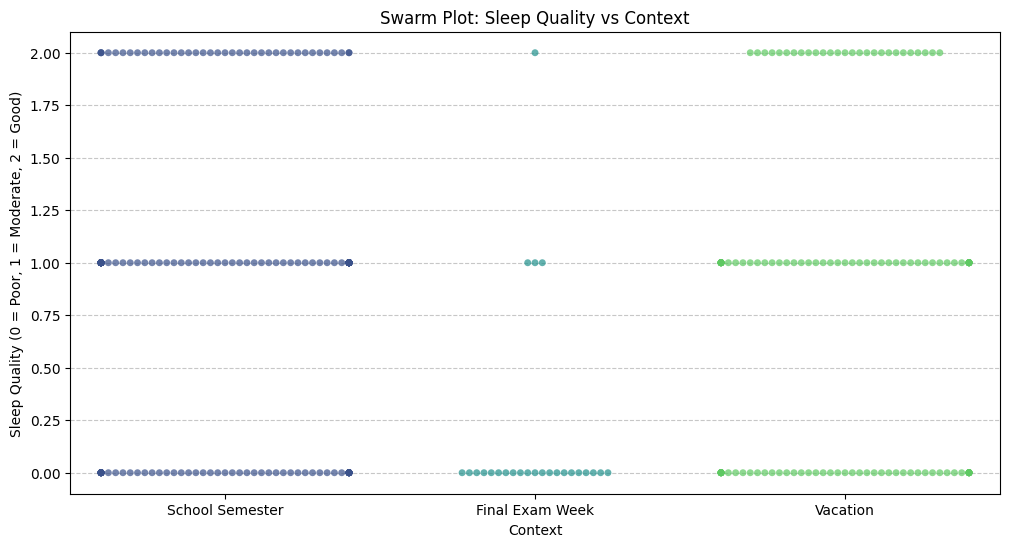

In [158]:
df = pd.read_excel(f'/content/Copy of Updated_Sleep_Dataset_With_Quality11.xlsx')
df.head()



plt.figure(figsize=(12, 6))
sns.swarmplot(x='Context', y='Sleep_Quality', data=df, palette='viridis', alpha=0.7)
plt.title('Swarm Plot: Sleep Quality vs Context')
plt.xlabel('Context')
plt.ylabel('Sleep Quality (0 = Poor, 1 = Moderate, 2 = Good)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()










# **Time of Sleep vs Sleep_Quality**

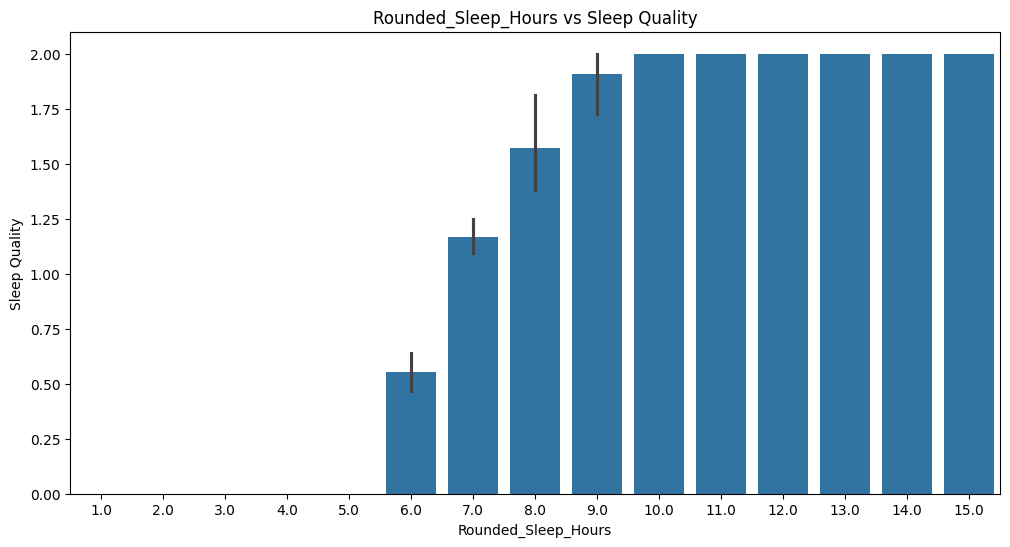

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Round Total_Sleep_Hours
df['Rounded_Sleep_Hours'] = df['Total_Sleep_Hours'].round()


plt.figure(figsize = (12, 6))
sns.barplot(x = 'Rounded_Sleep_Hours', y = 'Sleep_Quality', data = df)
plt.xlabel("Rounded_Sleep_Hours")
plt.ylabel("Sleep Quality")
plt.title("Rounded_Sleep_Hours vs Sleep Quality")
plt.show()


In [164]:

X = df[['Rounded_Sleep_Hours']]
Y = df['Sleep_Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

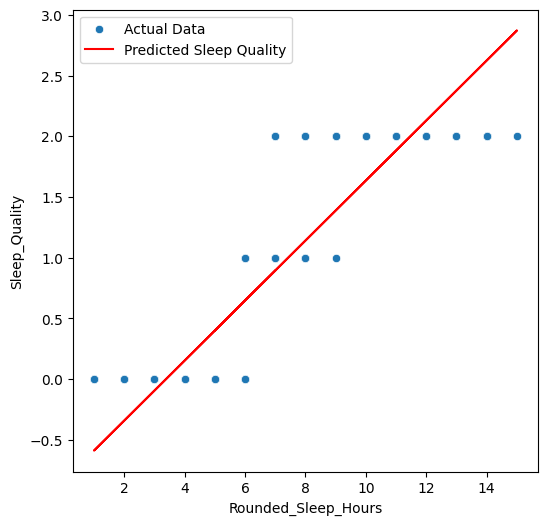

In [165]:

plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Rounded_Sleep_Hours', y = 'Sleep_Quality', data = df, label = 'Actual Data')
plt.plot(X, model.predict(X), color = 'red', label = 'Predicted Sleep Quality')
plt.legend()
plt.show()

In [166]:
from sklearn.metrics import r2_score
r2_score(Y, model.predict(X))

0.5807940020091109

# **SUMMARY**

In [168]:

df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()
print(corr['Sleep_Quality'].sort_values(ascending=False))

Sleep_Quality            1.000000
Total_Sleep_Hours        0.777171
Rounded_Sleep_Hours      0.762098
Core_Sleep               0.742409
REM_Sleep                0.741366
Deep_Sleep               0.702963
Total_Steps              0.158724
Total_Calories_Burned    0.125310
Unnamed: 0              -0.008042
Name: Sleep_Quality, dtype: float64


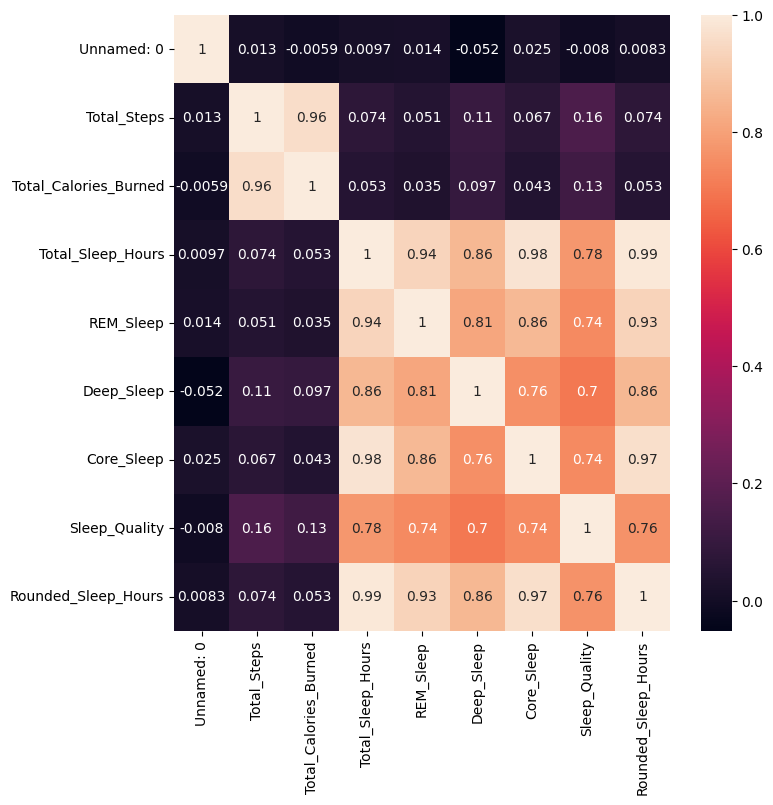

In [169]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Encode Context using one-hot encoding
df = pd.get_dummies(df, columns=['Context'], drop_first=True)


X = df[['Total_Steps', 'Total_Sleep_Hours', 'Context_School Semester', 'Context_Vacation']]
Y = df['Sleep_Quality']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)


Y_pred = rf_model.predict(X_test)


print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.81      0.86      0.83        29
           2       0.73      0.73      0.73        15

    accuracy                           0.86        71
   macro avg       0.85      0.84      0.84        71
weighted avg       0.86      0.86      0.86        71

Confusion Matrix:
[[25  2  0]
 [ 0 25  4]
 [ 0  4 11]]
Feature Importances:
                   Feature  Importance
1        Total_Sleep_Hours    0.892920
0              Total_Steps    0.092337
2  Context_School Semester    0.009330
3         Context_Vacation    0.005413
